### תרגיל בית 1
#### לירון אוחנה

### Data Exploration and Preprocessing

#### 1. Load the dataset

In [526]:
# ייבוא חבילות
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# טעינת הדאטה
df = pd.read_csv("students_data.csv")

# הצגת 5 השורות הראשונות
df.head(5)

,feature1,feature2,feature3,feature4,label
0,3.984735,15.767828,0.136371,3.043915,1
1,11.142359,24.628361,0.196689,3.083318,1
2,10.487314,18.346126,0.055332,0.128279,0
3,7.819583,17.449196,0.198131,3.007801,1
4,8.028921,20.747280,0.009201,-0.130778,0


#### 2. Basic Statistics

In [529]:
#הצגת הנתונים הסטטיסטיים והפיכתה להצגה ברורה יותר
df.describe().T

,count,mean,std,min,25%,50%,75%,max
feature1,1000.0,9.926965,1.983449,3.646592,8.636113,9.995765,11.295162,16.225820
feature2,1000.0,19.801200,5.055980,5.502431,16.311453,19.772042,23.224596,35.491497
feature3,1000.0,0.481443,0.284950,0.000243,0.233310,0.464065,0.719020,0.996013
feature4,1000.0,1.549059,1.507720,-0.368837,-0.002409,2.802161,3.008193,3.337738
label,1000.0,0.516000,0.499994,0.000000,0.000000,1.000000,1.000000,1.000000


#### 3. Data Cleaning:

In [532]:
# בדיקת ערכים חסרים וקבלת מידע על העמודות
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  1000 non-null   float64
 1   feature2  1000 non-null   float64
 2   feature3  1000 non-null   float64
 3   feature4  1000 non-null   float64
 4   label     1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


אין ערכים חסרים

#### 4. Visualizations:

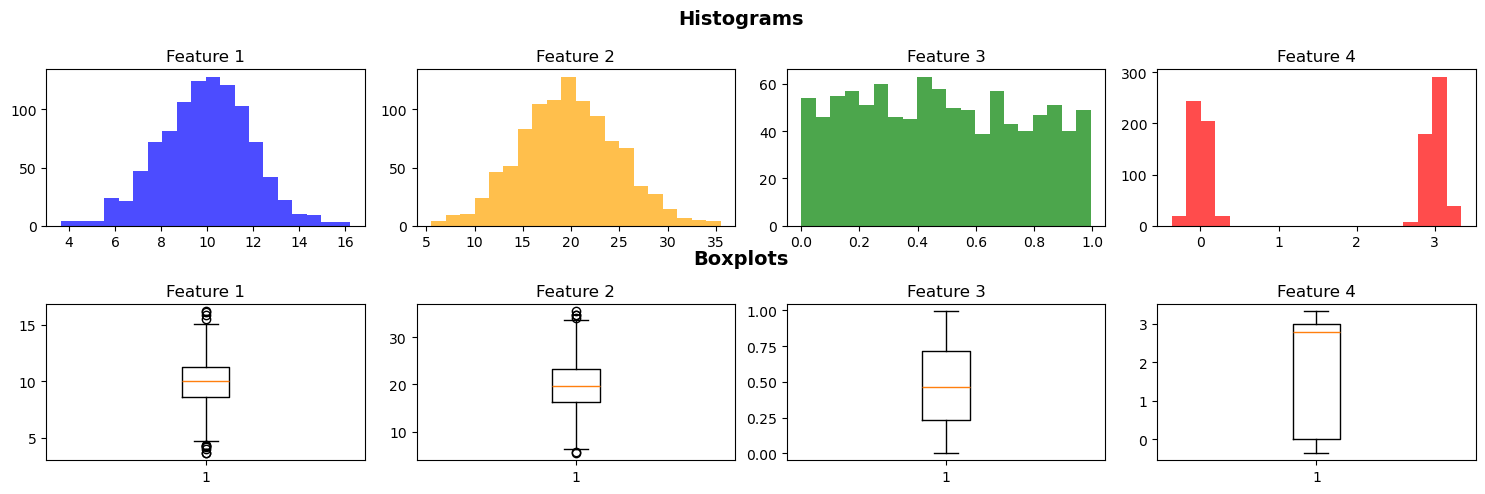

In [536]:
# יצירת 4 חלונות והגדרת גודל כל חלון
fig, axs = plt.subplots(2, 4, figsize=(15, 5))

#היסטוגרמות
# פיצ׳ר 1
axs[0,0].hist(df['feature1'], bins=20, color='blue', alpha=0.7)
axs[0,0].set_title('Feature 1')

# פיצ׳ר 2
axs[0,1].hist(df['feature2'], bins=20, color='orange', alpha=0.7)
axs[0,1].set_title('Feature 2')

# פיצ׳ר 3
axs[0,2].hist(df['feature3'], bins=20, color='green', alpha=0.7)
axs[0,2].set_title('Feature 3')

# פיצ׳ר 4
axs[0,3].hist(df['feature4'], bins=20, color='red', alpha=0.7)
axs[0,3].set_title('Feature 4')

# בוקספלוט
# פיצ׳ר 1
axs[1,0].boxplot(df['feature1'])
axs[1,0].set_title('Feature 1')

# פיצ׳ר 2
axs[1,1].boxplot(df['feature2'])
axs[1,1].set_title('Feature 2')

# פיצ׳ר 3
axs[1,2].boxplot(df['feature3'])
axs[1,2].set_title('Feature 3')

# פיצ׳ר 4
axs[1,3].boxplot(df['feature4'])
axs[1,3].set_title('Feature 4')

#כותרות
fig.text(0.5, 0.95, 'Histograms', ha='center', fontsize=14, fontweight='bold')
fig.text(0.5, 0.47, 'Boxplots', ha='center', fontsize=14, fontweight='bold')

# התאמת הפריסה
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.subplots_adjust(hspace=0.5) 
plt.show()

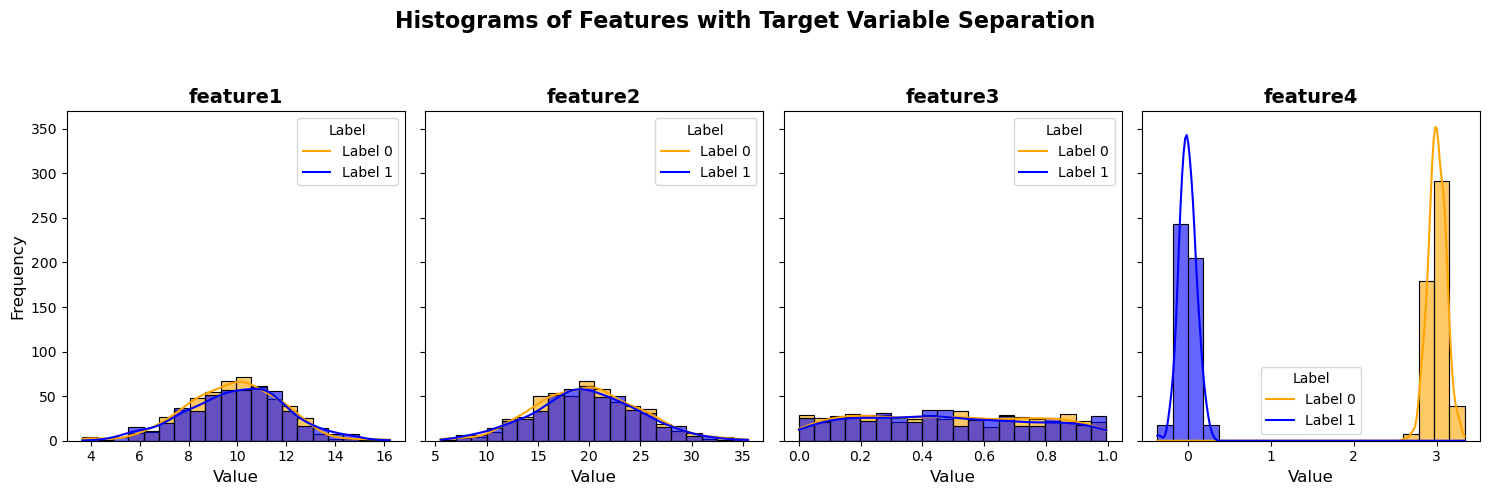

In [537]:
# רשימת הפיצ'רים
features = ['feature1', 'feature2', 'feature3', 'feature4']

# יצירת שורה אחת של גרפים
fig, axs = plt.subplots(1, 4, figsize=(15, 5), sharey=True)  # שיתוף ציר ה-y

# יצירת היסטוגרמה לכל פיצ'ר
for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, hue='label', kde=True, palette=['blue', 'orange'], alpha=0.6, bins=20, ax=axs[i])
    axs[i].set_title(f'{feature}', fontsize=14, fontweight='bold')
    axs[i].set_xlabel('Value', fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12 if i == 0 else 0)  # הצגת ylabel רק בגרף הראשון
    axs[i].legend(title='Label', labels=['Label 0', 'Label 1'], fontsize=10)

# כותרת כללית
fig.suptitle('Histograms of Features with Target Variable Separation', fontsize=16, fontweight='bold')

# התאמת פריסה
plt.tight_layout(rect=[0, 0, 1, 0.93])  # להשאיר מקום לכותרת הראשית
plt.show()

/var/folders/xv/y_q_yws557xfkjcb8prp8bch0000gn/T/ipykernel_20992/2443224807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette=['red', 'blue'], alpha=0.9)


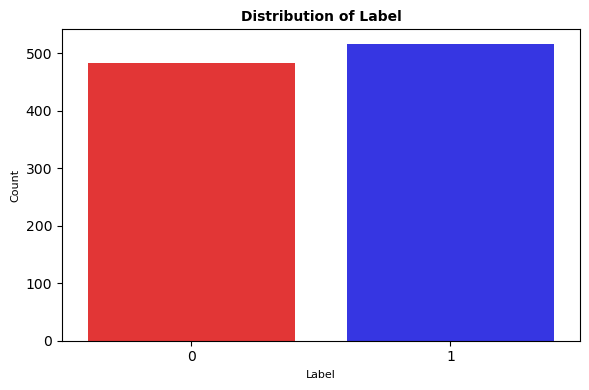

In [539]:
#בדיקת התפלגות משתנה המטרה
plt.figure(figsize=(6, 4))  
sns.countplot(data=df, x='label', palette=['red', 'blue'], alpha=0.9)

# הוספת כותרות וצירים
plt.title('Distribution of Label', fontsize=10, fontweight='bold')
plt.xlabel('Label', fontsize=8)
plt.ylabel('Count', fontsize=8)

# הצגת הגרף
plt.tight_layout()
plt.show()

הדאטה מאוזנת

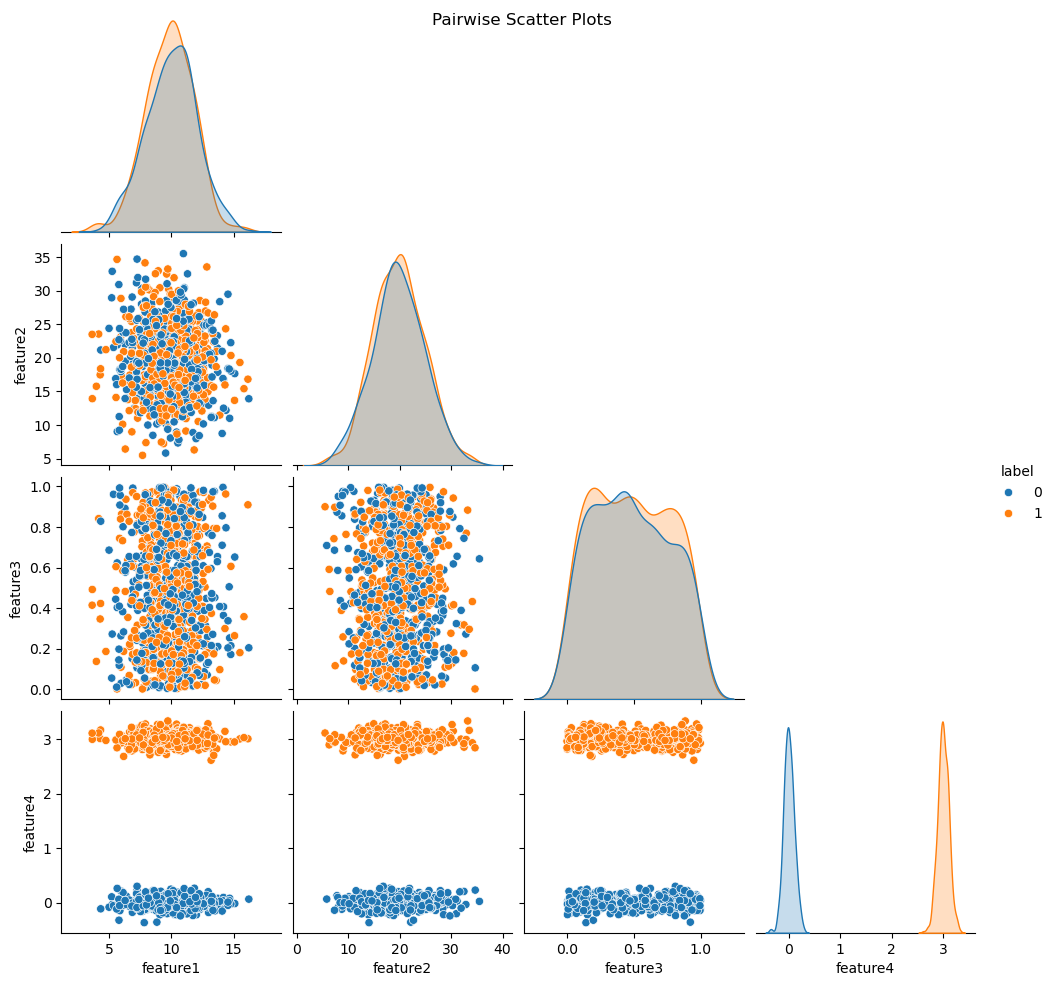

In [543]:
sns.pairplot(df, hue='label', corner=True)
plt.suptitle('Pairwise Scatter Plots')
plt.show()

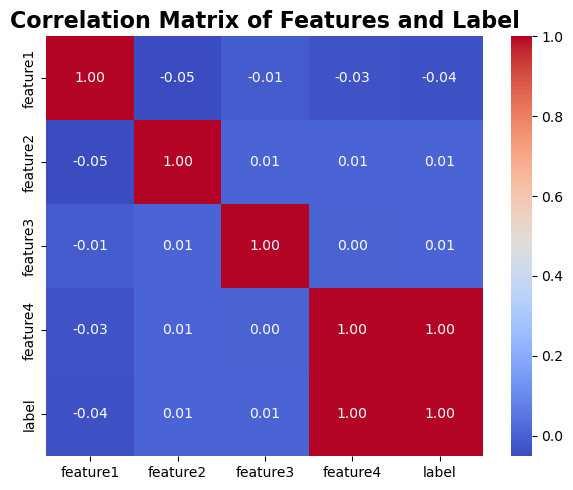

In [544]:
#נבדוק את הקשרים בין המשתנים
corr = df.corr()

# גרף Heatmap 
plt.figure(figsize=(6, 5))  # הגדרת גודל הגרף
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# הוספת כותרת לגרף
plt.title('Correlation Matrix of Features and Label', fontsize=16, fontweight='bold')

# הצגת הגרף
plt.tight_layout()
plt.show()

###  Feature Engineering

#### 1. Identify and Handle Anomalies:

נוריד את `feature4` 
כיוון שיש קורולציה מלאה בינו לבין עמודת הלייבל

In [550]:
df.drop(columns=['feature4'],inplace=True)

In [552]:
#זוהו כמה ערכים חריגים, נבצע עליהם ניתוח
# חישוב גבולות עבור פיצר 1
Q1_feature1 = df['feature1'].quantile(0.25)
Q3_feature1 = df['feature1'].quantile(0.75)
IQR_feature1 = Q3_feature1 - Q1_feature1
lower_bound_feature1 = Q1_feature1 - 1.5 * IQR_feature1
upper_bound_feature1 = Q3_feature1 + 1.5 * IQR_feature1

# חישוב גבולות עבור פיצר 2
Q1_feature2 = df['feature2'].quantile(0.25)
Q3_feature2 = df['feature2'].quantile(0.75)
IQR_feature2 = Q3_feature2 - Q1_feature2
lower_bound_feature2 = Q1_feature2 - 1.5 * IQR_feature2
upper_bound_feature2 = Q3_feature2 + 1.5 * IQR_feature2

print("Feature 1:")
print(f"Lower Bound: {lower_bound_feature1}")
print(f"Upper Bound: {upper_bound_feature1}\n")

print("Feature 2:")
print(f"Lower Bound: {lower_bound_feature2}")
print(f"Upper Bound: {upper_bound_feature2}")

Feature 1:
Lower Bound: 4.647537736875002
Upper Bound: 15.283737121875

Feature 2:
Lower Bound: 5.941739876249999
Upper Bound: 33.59430950625


In [554]:
# חישוב כמות חריגים פיצר 1
outliers_feature1 = df[(df['feature1'] < lower_bound_feature1) | (df['feature1'] > upper_bound_feature1)]
num_outliers_f1 = len(outliers_feature1)
percentage_outliers_f1 = (num_outliers_f1 / len(df)) * 100

# חישוב כמות חריגים פיצר 2
outliers_feature2 = df[(df['feature2'] < lower_bound_feature2) | (df['feature2'] > upper_bound_feature2)]
num_outliers_f2 = len(outliers_feature2)
percentage_outliers_f2 = (num_outliers_f2 / len(df)) * 100

# Print the results
print(f"Feature 1: {num_outliers_f1} outliers ({percentage_outliers_f1:.2f}% of the data)")
print(f"Feature 2: {num_outliers_f2} outliers ({percentage_outliers_f2:.2f}% of the data)")

Feature 1: 11 outliers (1.10% of the data)
Feature 2: 6 outliers (0.60% of the data)


כיוון שאלו כמויות קטנות מאוד ואחוז קטן מהדאטה נעדיף להסיר אותם כדי שלא יטו את ביצועי המודל

In [557]:
df = df[
    (df['feature1'] >= lower_bound_feature1) & (df['feature1'] <= upper_bound_feature1) &
    (df['feature2'] >= lower_bound_feature2) & (df['feature2'] <= upper_bound_feature2)
]

# Reset the index of the cleaned data
df.reset_index(drop=True, inplace=True)

In [559]:
df.shape

(983, 4)

#### 2. Feature Scaling+data Splitting

יותר נכון קודם לחלק את הנתונים לאימון, ולידציה ומבחן לפני נרמול הנתונים כדי למנוע זליגת מידע ולכן קודם נבצע חלוקה

In [563]:
from sklearn.model_selection import train_test_split
X, y = df.drop('label', axis=1), df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, shuffle=True)
print(f"Train Features:\nX_train: {X_train.shape}\ny_train:{y_train.shape}\n")
print(f"Validation Features:\nX_val: {X_val.shape}\ny_val:{y_val.shape}\n")
print(f"Test Features:\nX_test: {X_val.shape}\ny_test:{y_test.shape}")


Train Features:
X_train: (688, 3)
y_train:(688,)

Validation Features:
X_val: (147, 3)
y_val:(147,)

Test Features:
X_test: (147, 3)
y_test:(148,)


בחרתי לנרמל בשיטת ה `standardscaler`

In [566]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_val)
scaler.transform(X_test)

array([[ 4.33208892e-01,  1.93740830e-01, -1.44936071e+00],
       [ 1.56113154e-01, -1.86573497e-01,  1.28898068e+00],
       [-4.33734184e-01,  1.90007325e-01,  1.34774108e+00],
       [-5.40703487e-01,  8.84429288e-03, -6.52523057e-01],
       [ 3.52250904e-02,  2.43089754e-01,  6.73579870e-02],
       [ 6.83029218e-01,  1.19370914e+00,  4.49269909e-01],
       [-8.99931240e-01,  2.54233413e-01, -9.64680153e-01],
       [-9.75385728e-01, -4.70704903e-01, -1.58474470e+00],
       [ 7.67382820e-01, -8.57829879e-01, -2.94837274e-01],
       [-6.14862300e-01,  1.33991680e+00,  2.22628509e-01],
       [-1.81398275e+00,  1.30169151e+00,  5.62813861e-01],
       [ 5.73363738e-01, -1.01668749e+00, -1.25226329e+00],
       [-9.53566802e-02,  1.12614376e-01,  1.70297495e+00],
       [ 1.27873085e+00,  1.29611820e-03, -6.70726050e-01],
       [-9.90285470e-01,  7.89165612e-01, -8.67999173e-01],
       [ 6.68398748e-01,  2.28103240e-01, -8.05494492e-01],
       [-1.05028137e-01,  1.03908823e-01

### 3. Model Implementation

#### Model Selection:

In [570]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [572]:
#בתור התחלה בחרתי k=5 באופן שרירותי
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [574]:
# הערכת ביצועים ראשונית על k=5
y_pred = knn.predict(X_val)

In [576]:
print("Performance Metrics for KNN Model (k=5, p=2):\n")
print("accuracy score : ",
accuracy_score(y_val,y_pred))
print( "precision score: ", precision_score(y_val,y_pred))
print( "recall score: ", recall_score(y_val,y_pred))
print( "F1 score: ", f1_score(y_val,y_pred))

Performance Metrics for KNN Model (k=5, p=2):

accuracy score :  0.5374149659863946
precision score:  0.5232558139534884
recall score:  0.625
F1 score:  0.569620253164557


נבצע תהליך היפר פרמטר כדי לאתר את הפרמטרים הטובים ביותר לדאטה ולמודל

In [579]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
parameters = {'n_neighbors': list(range(1, 50)), 'p': [1, 2]}
model = GridSearchCV(knn, parameters,cv = 5, scoring='accuracy')

model.fit(X_train, y_train)

model.best_params_

{'n_neighbors': 39, 'p': 1}

נבדוק גם את השיטה הידנית

In [582]:
neighbors, scores, scores_train = [], [], []
neighbors1, scores1, scores_train1 = [], [], []

for k in range(1, 50):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors=k,p=2)
    knn.fit(X_train, y_train)
    score = knn.score(X_val, y_val)
    scores.append(score)
    score_train = knn.score(X_train, y_train)
    scores_train.append(score_train)

for k in range(1, 50):
    neighbors1.append(k)
    knn = KNeighborsClassifier(n_neighbors=k,p=1)
    knn.fit(X_train, y_train)
    score = knn.score(X_val, y_val)
    scores1.append(score)
    score_train = knn.score(X_train, y_train)
    scores_train1.append(score_train)

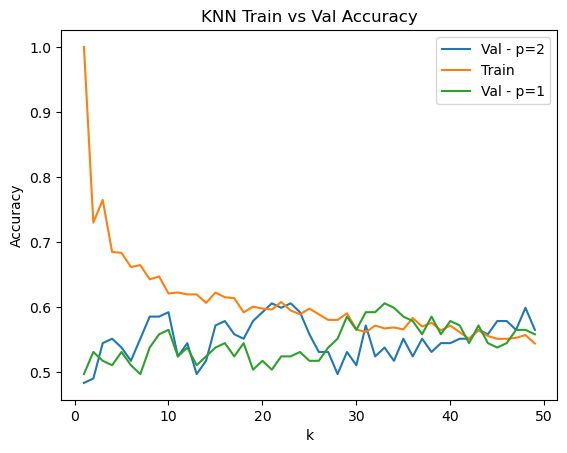

In [583]:
ax = plt.plot(neighbors, scores, label='Val - p=2')
plt.plot(neighbors, scores_train, label='Train')
plt.plot(neighbors1, scores1, label='Val - p=1')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Train vs Val Accuracy')
plt.legend()
plt.show()

#### 6. Model Evaluation:

##### GridSearchCV

In [588]:
knn_GS_CV = KNeighborsClassifier(n_neighbors=39,p=1)
knn_GS_CV.fit(X_train, y_train)
y_pred_GS_CV = knn_GS_CV.predict(X_val)
print("Performance Metrics for KNN Model (GridSearchCV) (k=39, p=1):\n")
print("accuracy score : ",
accuracy_score(y_val,y_pred_GS_CV))
print( "precision score: ", precision_score(y_val,y_pred_GS_CV))
print( "recall score: ", recall_score(y_val,y_pred_GS_CV))
print( "F1 score: ", f1_score(y_val,y_pred_GS_CV))

Performance Metrics for KNN Model (GridSearchCV) (k=39, p=1):

accuracy score :  0.5578231292517006
precision score:  0.5327102803738317
recall score:  0.7916666666666666
F1 score:  0.6368715083798882


##### Manual Iteration 

In [591]:
knn_MI = KNeighborsClassifier(n_neighbors=10,p=2)
knn_MI.fit(X_train, y_train)
y_pred_MI = knn_MI.predict(X_val)
print("Performance Metrics for KNN Model (Manual Iteration) (k=10, p=2):\n")
print("accuracy score : ",
accuracy_score(y_val,y_pred_MI))
print( "precision score: ", precision_score(y_val,y_pred_MI))
print( "recall score: ", recall_score(y_val,y_pred_MI))
print( "F1 score: ", f1_score(y_val,y_pred_MI))

Performance Metrics for KNN Model (Manual Iteration) (k=10, p=2):

accuracy score :  0.5918367346938775
precision score:  0.5882352941176471
recall score:  0.5555555555555556
F1 score:  0.5714285714285715


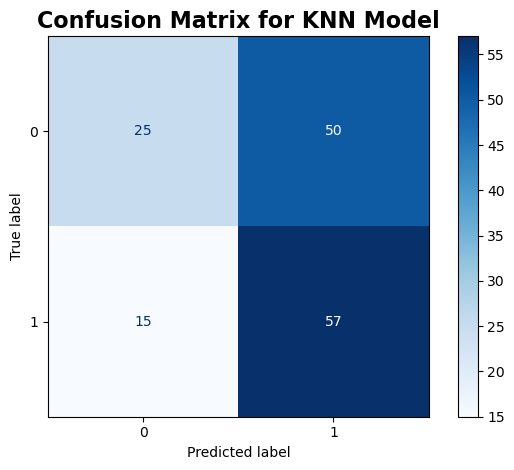

In [595]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred_GS_CV, labels=knn_GS_CV.classes_)

# הגדרת נתוני הגרף

# הצגת מטריצת הבלבול ישירות ללא יצירת גרף כפול
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_GS_CV.classes_)
disp.plot(cmap="Blues", values_format='d')  # הצגת מספרים שלמים בלבד

# הוספת כותרת לגרף
plt.title('Confusion Matrix for KNN Model', fontsize=16, fontweight='bold')

# הצגת הגרף
plt.tight_layout()
plt.show()

#### bonus challenge

In [598]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # הפחתת מימדיות לשני רכיבים
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_val)

# שלב 3: אימון מודל k-NN על הנתונים לאחר PCA
knn_pca = KNeighborsClassifier(n_neighbors=39, p=1)
knn_pca.fit(X_train_pca, y_train)

# חיזוי והערכת ביצועים
y_pred_pca = knn_pca.predict(X_test_pca)
f1_score_pca = f1_score(y_val, y_pred_pca)

# שלב 4: השוואה לנתונים המקוריים
knn_original = KNeighborsClassifier(n_neighbors=39, p=1)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_val)
f1_score_original = f1_score(y_val, y_pred_original)

print(f"f1_score with PCA: {f1_score_pca}")
print(f"f1_score without PCA: {f1_score_original}")


f1_score with PCA: 0.6444444444444446
f1_score without PCA: 0.6368715083798882


#### Model Implementation -Test set

In [601]:
pca = PCA(n_components=2)  # הפחתת מימדיות לשני רכיבים
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# שלב 3: אימון מודל k-NN על הנתונים לאחר PCA
knn_pca = KNeighborsClassifier(n_neighbors=39, p=1)
knn_pca.fit(X_train_pca, y_train)

# חיזוי והערכת ביצועים
y_pred_pca = knn_pca.predict(X_test_pca)

In [603]:
print("accuracy score : ",
accuracy_score(y_test,y_pred_pca))
print( "precision score: ", precision_score(y_test,y_pred_pca))
print( "recall score: ", recall_score(y_test,y_pred_pca))
print( "F1 score: ", f1_score(y_test,y_pred_pca))

accuracy score :  0.4527027027027027
precision score:  0.4411764705882353
recall score:  0.6521739130434783
F1 score:  0.5263157894736842


In [605]:
knn = KNeighborsClassifier(n_neighbors=39,p=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [607]:
print("accuracy score : ",
accuracy_score(y_test,y_pred))
print( "precision score: ", precision_score(y_test,y_pred))
print( "recall score: ", recall_score(y_test,y_pred))
print( "F1 score: ", f1_score(y_test,y_pred))

accuracy score :  0.4594594594594595
precision score:  0.44660194174757284
recall score:  0.6666666666666666
F1 score:  0.5348837209302325
